Dataset

-   Title: Haberman's Survival Data
-   Sources:
    - (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
    - (b) Date: March 4, 1999
-   Past Usage:
    Haberman, S. J. (1976). Generalized Residuals for Log-Linear
    Models, Proceedings of the 9th International Biometrics
    Conference, Boston, pp. 104-122.
    Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
    Graphical Models for Assessing Logistic Regression Models (with
    discussion), Journal of the American Statistical Association 79:
    61-83.
    Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
    Department of Statistics, University of Wisconsin, Madison, WI.
    Relevant Information:
    The dataset contains cases from a study that was conducted between
    1958 and 1970 at the University of Chicago's Billings Hospital on
    the survival of patients who had undergone surgery for breast
    cancer.
-   Number of Instances: 306
-   Number of Attributes: 4 (including the class attribute)
-   Attribute Information:
    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute)
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year
    Missing Attribute Values: None

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/home/shri/Downloads/haberman.csv")
df.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
print("Unique variables and there values are")
df.status.value_counts()

Unique variables and there values are


1    225
2     81
Name: status, dtype: int64

## Objective :
#### Based on the inputs of patient information such as age, year, nodes classify patient is survived or not within 5 years duration.

# Univariant Analysis

- Accourding to obejctive preceptive we should focus on patient status
- Status has numarical type but it is having categorical in nature as it has fix variable values such as 1 and 2
- ploting types for univariant anaysis : CDF, Hist, PDF, BOX...

1. PDF

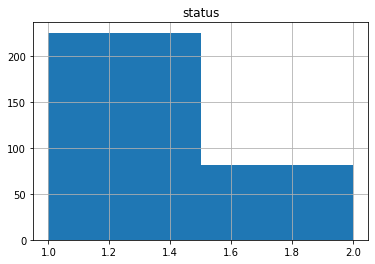

In [5]:
df.hist(column="status", bins=2)
plt.xlabel("")
plt.show()

- Status set has one and two values for died and survived patients.
- For categorization, dataset is imbalance.

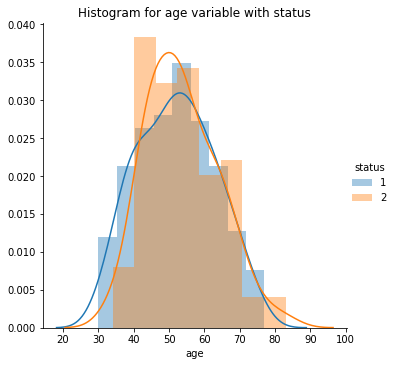

In [6]:
sns.FacetGrid(df, hue ="status" , height= 5).map(sns.distplot, "age").add_legend();
plt.title("Histogram for age variable with status")
plt.show()

- Age variable is not giving clear picture for categorization of data.
- slight difflection in value which suggests as if age is less than 35 then patient has higher probability of surviving.

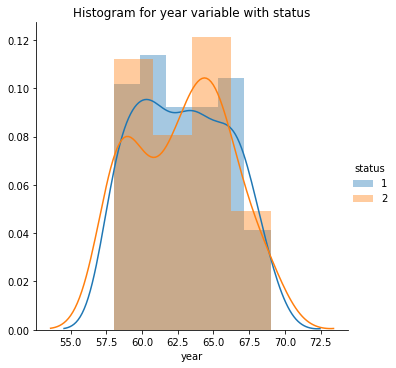

In [7]:
sns.FacetGrid(df, hue ="status" , height= 5).map(sns.distplot, "year").add_legend();
plt.title("Histogram for year variable with status")
plt.show()

- year has no direct relation with status of patient
- Patient survived and died are slight change as varibles gets in between 62 and 67.

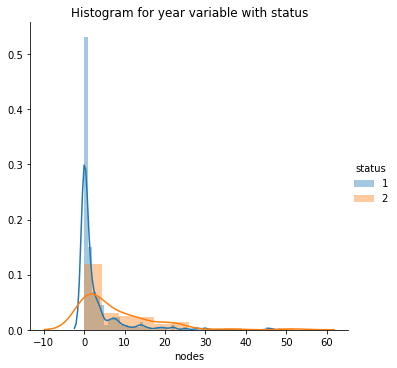

In [8]:
sns.FacetGrid(df, hue ="status" , height= 5).map(sns.distplot, "nodes").add_legend();
plt.title("Histogram for year variable with status")
plt.show()

- If node has values from 30 onwords then its higher probability patient died.
- Slight spick at 45 for survived but it is too small.

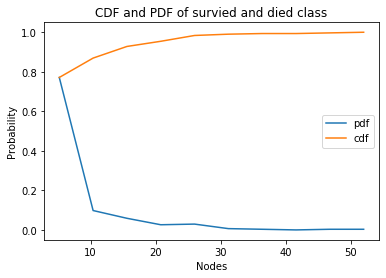

In [9]:

#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('CDF and PDF of survied and died class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()
plt.show();

In [10]:

#1-D scatter plot of nodes
haberman_survaived = df.loc[df["status"] == 1];
haberman_died = df.loc[df["status"] == 2];

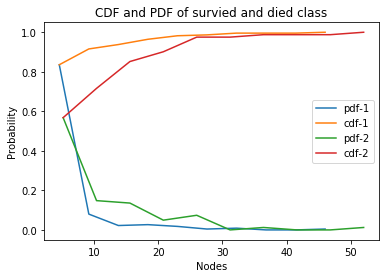

In [11]:

#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-1');
plt.plot(bin_edges[1:], cdf, label='cdf-1')

#Plot CDF of nodes for survied and died
counts, bin_edges = np.histogram(haberman_died['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
#print("pdf for nodes", pdf);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-2');
plt.plot(bin_edges[1:], cdf, label='cdf-2')
plt.title('CDF and PDF of survied and died class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()
plt.show();

- It shows that if patient is is suffering for breast cancer and he is going through surgery it is both chances for surviving and diing.
- those who have lesser values from 20 have little higher Probability of surviving.
- those who are having nodes less than 8 have high Probability of surviving.

In [12]:
haberman_survaived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [13]:
haberman_died.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


- Both coditions have means and std as follows:
    - Nodes Mean survived       - 2.79
    - Nodes Mean died           - 7.45
    - Nodes Std for survived    - 5.87
    - Nodes Std for died        - 9.18
    - Nodes IQR for survived    - 0:3
    - Nodes IQR for died        - 1:11

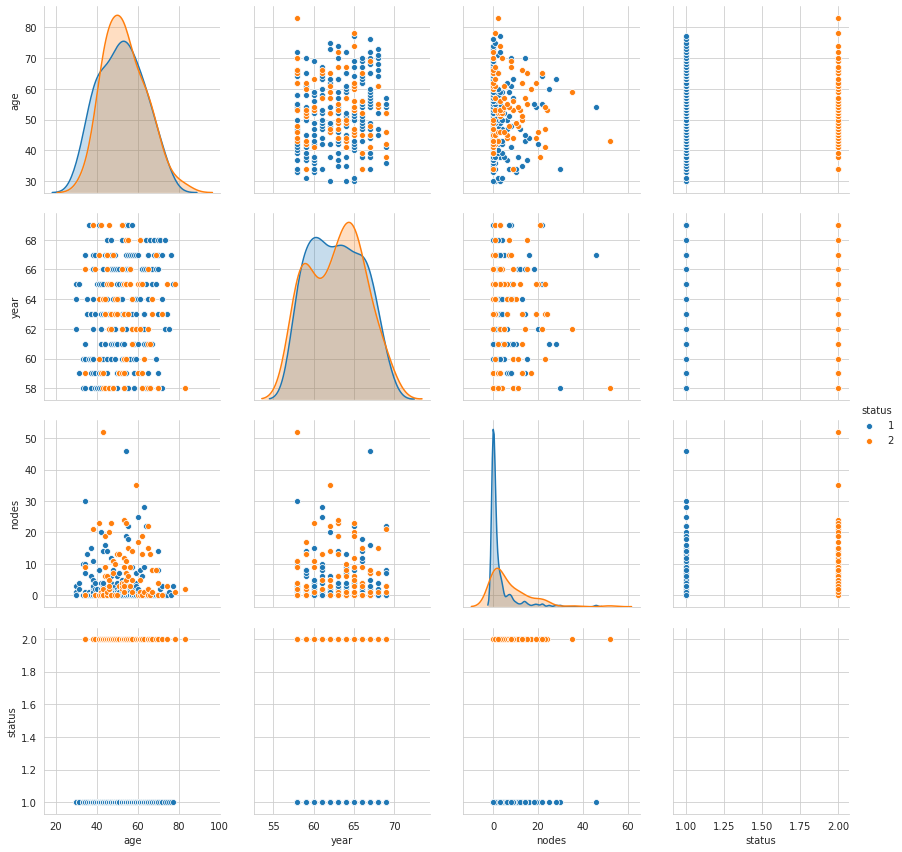

In [14]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df, hue = "status", height=3);
plt.show()

- For age variable is almost non seperable for both classes.
- For year variable is almost non seperable for survied and died cases.
- Nodes have slight difflection in curves, we can use that data more effectively for categorizations.